# Preprocessing for Evaluation
To evaluate the trust mining method, we use several bpmn diagrams, mesaure their features, mining time and metrics and compare them

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

This is the first dataset from BPMN 6219 and from the Unicam set. See here: https://ieee-dataport.org/documents/6219-pairs-bpmn-images-and-definition-files

In [328]:
bpmn_6219 = pd.read_csv("../evaluation_bpmn6219.csv")

In [329]:
bpmn_81 = pd.read_csv("../evaluation_bpmn81.csv")

In [330]:
bpmn_6219_81 = bpmn_6219.append(bpmn_81)

In [331]:
len(bpmn_6219_81)

6300

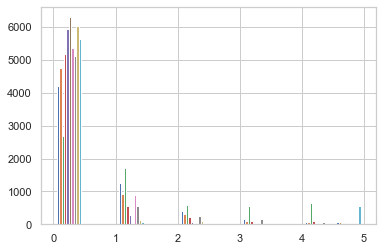

In [335]:
plt.hist(bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']], range=(0,5))
plt.show()

In [337]:
bpmn_6219_81[['endEventRequiredErrors',
                       'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                       'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                       'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                       'noInclusiveGatewayErrors', 'conditionalFlowErrors']].sum()

endEventRequiredErrors             4352
startEventRequiredErrors           3188
fakeJoinErrors                     8179
noDisconnectedErrors               3342
superfluousGatewayErrors            507
subProcessBlankStartEventErrors       7
noGatewayJoinForkErrors            1047
noImplicitSplitErrors              2848
noInclusiveGatewayErrors            473
conditionalFlowErrors              2956
dtype: int64

In [376]:
acceptable_bpmn_6219_81_df = bpmn_6219_81[(bpmn_6219_81['endEventRequiredErrors'] == 0) & 
                                          (bpmn_6219_81['startEventRequiredErrors'] == 0) &
                                          (bpmn_6219_81['noDisconnectedErrors'] == 0) &
                                          #(bpmn_6219_81['superfluousGatewayErrors'] == 0) &
                                          (bpmn_6219_81['subProcessBlankStartEventErrors'] == 0) &
                                          (bpmn_6219_81['noGatewayJoinForkErrors'] == 0) &
                                          (bpmn_6219_81['noImplicitSplitErrors'] == 0) &
                                          (bpmn_6219_81['noInclusiveGatewayErrors'] == 0) &
                                          (bpmn_6219_81['conditionalFlowErrors'] == 0) #&
                                          #(bpmn_6219_81['fakeJoinErrors'] == 0)
                                         ]

In [377]:
usable_bpmn_6219_81_df = acceptable_bpmn_6219_81_df[acceptable_bpmn_6219_81_df["modelNP"]>1]
len(usable_bpmn_6219_81_df)

852

In [379]:
unique_bpmn_6219_81_df = usable_bpmn_6219_81_df.drop_duplicates(subset=['modelIsValidBPMN', 'modelTNT', 'modelTNCS', 'modelTNA', 
                                                             'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                             'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                             'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                             'tapeLUB', 'tapeAvgLUB',
                                                             'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                             'applicationDomain', 'endEventRequiredErrors',
                                                             'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                             'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                             'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                             'noInclusiveGatewayErrors', 'conditionalFlowErrors'], keep='first')
len(unique_bpmn_6219_81_df)

119

In [380]:
#valid_bpmn_6219_81_df = bpmn_6219_81[bpmn_6219_81["modelIsValidBPMN"]]
#len(valid_bpmn_6219_81_df)

In [381]:
unique_bpmn_6219_81_df.head()

,fileName,modelIsValidBPMN,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,modelTNE,modelTNSF,modelNP,modelNL,modelCLA,modelCLP,modelPDOPin,modelPDOPout,modelPDOTOut,modelPLT,tapeGU,tapeALU,tapeRLU,tapeLUB,tapeAvgLUB,tapeDI,tapeDD,tapeAvgDI,tapeAvgDD,tapeMI,tapeMD,tapeAvgMI,tapeAvgMD,tapeExecutionTimeMs,applicationDomain,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors
5,00005.bpmn,True,15,0,15,0,4,3,1,1,3,27,3,5,0.555556,1.000000,0.0,0.0,0.0,0.333333,211,70.333333,"0.6113744075829384,0.25118483412322273,0.13744...","0.27804107424960506,-0.08214849921011058,-0.19...",9.251859e-18,"0,0,0","0,0,0",0,0,"2,1,0","1,1,1",1.000000,1.000000,46.121494,NaN,0,0,3,0,0,0,0,0,0,0
13,00013.bpmn,True,11,0,11,0,2,2,3,3,2,20,2,0,0.550000,4.000000,0.0,0.0,0.0,0.000000,0,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,0,0,NaN,NaN,0.000000,0.000000,22.819357,NaN,0,0,2,0,0,0,0,0,0,0
14,00014.bpmn,True,11,0,11,0,2,3,4,4,2,21,2,0,0.523810,3.000000,0.0,0.0,0.0,0.000000,163,81.500000,"0.4049079754601227,0.5950920245398773","-0.0950920245398773,0.0950920245398773",0.000000e+00,"0,0","0,0",0,0,"1,1","1,1",1.000000,1.000000,35.124959,NaN,0,0,1,0,0,0,0,0,0,0
79,00079.bpmn,False,12,0,12,1,9,5,7,7,4,37,3,3,0.324324,2.333333,0.0,0.0,0.0,0.250000,260,86.666667,"0.5307692307692308,0.3730769230769231,0.096153...","0.19743589743589746,0.03974358974358977,-0.237...",1.850372e-17,"0,0,0","0,0,0",0,0,"2,1,1","2,1,1",1.333333,1.333333,42.456582,NaN,0,0,0,0,0,0,0,0,0,0
86,00086.bpmn,True,6,0,6,0,1,2,0,0,2,10,2,0,0.600000,1.000000,0.0,0.0,0.0,0.000000,86,43.000000,"0.6627906976744186,0.3372093023255814","0.16279069767441856,-0.16279069767441862",-2.775558e-17,"0,0","0,0",0,0,"1,1","1,1",1.000000,1.000000,8.943993,NaN,0,0,1,0,0,0,0,0,0,0


In [382]:
usable_bpmn_6219_81_df["modelNP"].unique()

array([ 3,  2,  4,  5, 11,  9,  7,  6, 13,  8, 12, 14, 10])

<AxesSubplot:>

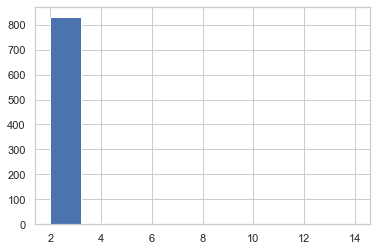

In [384]:
usable_bpmn_6219_81_df["modelNP"].hist()

## Characteristics
To get an overview over the raw dataset, we use violin plots to show the distribution of certain characteristics in the models and compare them later to the Metrics introduced with Trust Mining.

The violin plots use a *kernel density estimator* with a width of 8 to smoothen the unequally distributed features.

In [385]:
import seaborn as sns
import matplotlib as plt

In [386]:
static_characteristics = unique_bpmn_6219_81_df[['modelTNT', 'modelTNCS', 'modelTNA',
                                                'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                'tapeALU', 'tapeRLU', 'tapeLUB', 'tapeAvgLUB',
                                                'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                'tapeExecutionTimeMs', 'applicationDomain', 'endEventRequiredErrors',
                                                'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                'noInclusiveGatewayErrors', 'conditionalFlowErrors']]

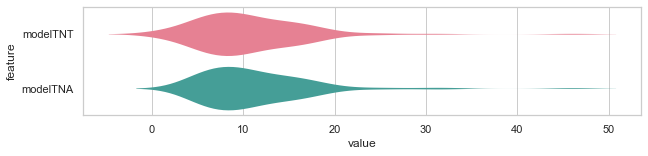

In [387]:
raw_model_characteristics_activities = unique_bpmn_6219_81_df[['modelTNT', 'modelTNA']]
raw_model_characteristics_activities_series_stacked = raw_model_characteristics_activities.stack()
raw_model_characteristics_activities_series_stacked.index = raw_model_characteristics_activities_series_stacked.index.droplevel(level=0)
raw_model_characteristics_activities_df = pd.DataFrame(raw_model_characteristics_activities_series_stacked).reset_index()
raw_model_characteristics_activities_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_characteristics_activities_df, scale="count", palette="husl", width=0.8, linewidth=0)
ax.figure.set_size_inches(10, len(raw_model_characteristics_activities_df["feature"].unique()))

In [388]:
raw_model_characteristics = unique_bpmn_6219_81_df[['modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP']]

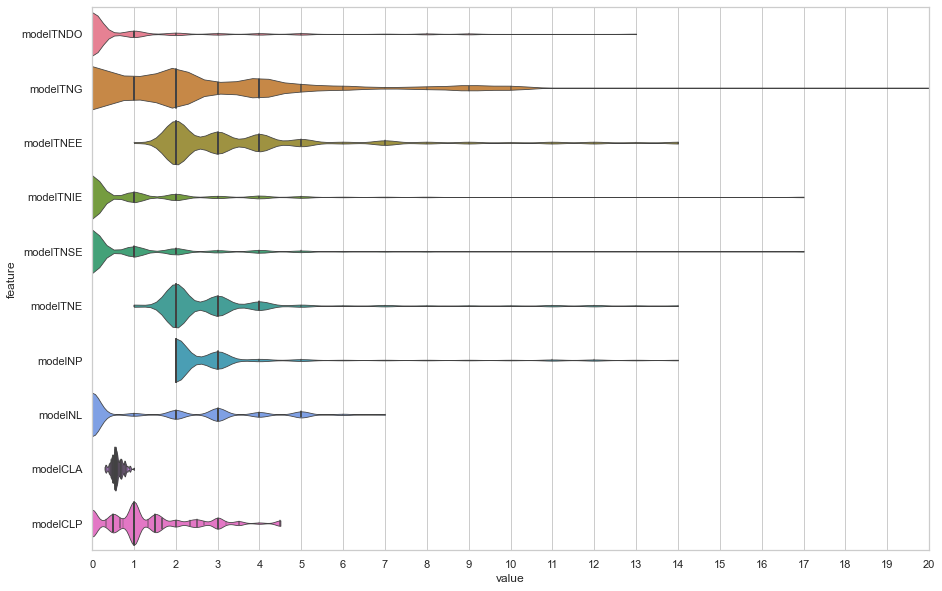

In [429]:
raw_model_characteristics_series_stacked = raw_model_characteristics.stack()
raw_model_characteristics_series_stacked.index = raw_model_characteristics_series_stacked.index.droplevel(level=0)
raw_model_df = pd.DataFrame(raw_model_characteristics_series_stacked).reset_index()
raw_model_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_df, scale="count", palette="husl", width=0.8, cut=0, inner="stick", bw=0.1, linewidth=0.8)
ax.figure.set_size_inches(15, len(raw_model_df["feature"].unique()))
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0,21))

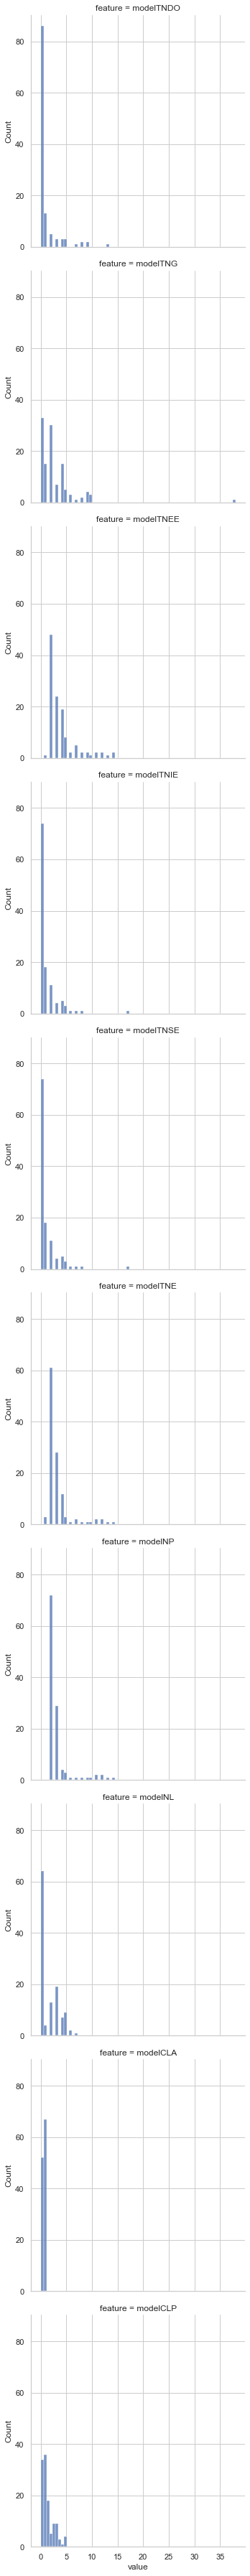

In [390]:
sns.displot(raw_model_df, x="value", row="feature")

<AxesSubplot:>

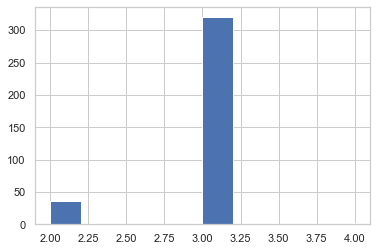

In [220]:
usable_bpmn_6219_81_df["modelNP"].hist()

In [169]:
import sys
!{sys.executable} -m pip install seaborn